## UnderSampling Method

In [41]:
import os
import pandas as pd
import numpy as np

df=pd.read_csv("./creditcard.csv")
df

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0


In [42]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib

In [43]:
# Scaling

df['New_Amount'] = RobustScaler().fit_transform(df['Amount'].values.reshape(-1,1))
df['New_Time'] = RobustScaler().fit_transform(df['Time'].values.reshape(-1,1))

df.drop(['Time','Amount'], axis=1, inplace=True)
df

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V22,V23,V24,V25,V26,V27,V28,Class,New_Amount,New_Time
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0,1.783274,-0.994983
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,0,-0.269825,-0.994983
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,0,4.983721,-0.994972
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0,1.418291,-0.994972
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,0,0.670579,-0.994960
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,4.356170,...,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0,-0.296653,1.034951
284803,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,-0.975926,...,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,0,0.038986,1.034963
284804,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,-0.484782,...,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,0,0.641096,1.034975
284805,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,-0.399126,...,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,0,-0.167680,1.034975


In [44]:
X = df.drop('Class', axis=1)
y = df['Class']

In [45]:
# Undersampling
from imblearn.under_sampling import RandomUnderSampler

under = RandomUnderSampler(random_state=42)
under.fit(X, y)
X_resampled, y_resampled = under.fit_sample(X, y)

df = pd.concat([X_resampled, y_resampled],axis=1)

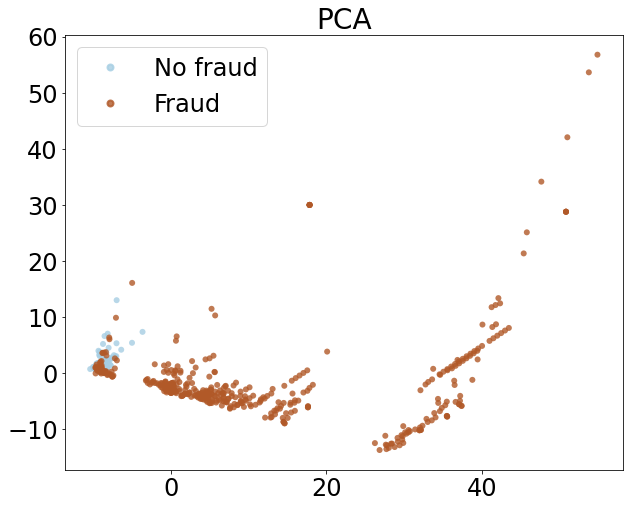

In [46]:
# PCA

pca = PCA(n_components = 2)
p = pca.fit_transform(X_resampled)
plt.figure(figsize=(10,8))
# plt.scatter(p[:,0], p[:,1], c = y_resampled, cmap = "Paired", alpha=0.8)
l = ['No fraud','Fraud']
graph = plt.scatter(p[:,0], p[:,1], c=y_resampled, cmap = "Paired", linewidths=2,alpha=0.8, edgecolors='none') 
plt.legend(handles=graph.legend_elements()[0],labels = l,fontsize=24)
plt.title('PCA', fontsize=28)
matplotlib.rc('xtick', labelsize=24) 
matplotlib.rc('ytick', labelsize=24) 
plt.show()

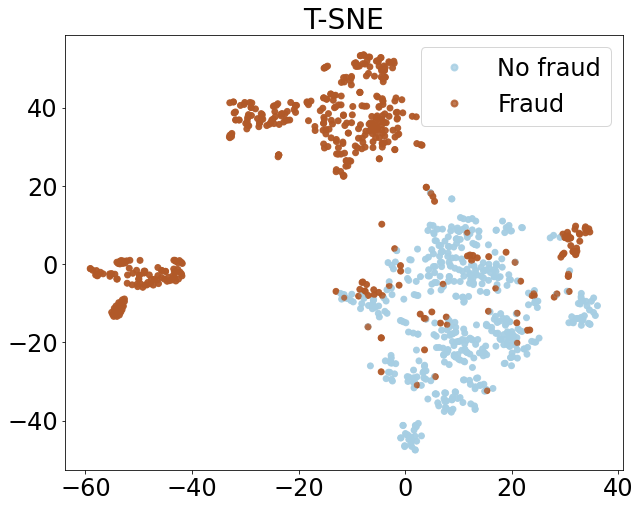

In [31]:
# T-SNE
from sklearn.manifold import TSNE
import matplotlib

q = TSNE(n_components=2).fit_transform(X_resampled)
plt.figure(figsize=(10,8))
plt.scatter(q[:,0], q[:,1], c = y_resampled, cmap = "Paired", alpha=0.8)
l = ['No fraud','Fraud']
graph = plt.scatter(q[:,0], q[:,1], c=y_resampled, cmap = "Paired", linewidths=2,alpha=0.8, edgecolors='none') 
plt.legend(handles=graph.legend_elements()[0],labels = l,fontsize=24)
plt.title('T-SNE', fontsize=28)
matplotlib.rc('xtick', labelsize=24) 
matplotlib.rc('ytick', labelsize=24) 
plt.show()

In [47]:
# Split resampled data into training dataset and test dataset
from sklearn.model_selection import train_test_split

X_resampled = df.drop('Class', axis=1)
y_resampled = df['Class']
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

In [48]:
### Training Models

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
import time
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import f1_score

In [49]:
# Logistic Regression

classif = LogisticRegression()
time_start = time.process_time()
model=classif.fit(X_train, y_train)
time_end = time.process_time()
y_pred = model.predict(X_test)
training_time = time_end - time_start
train_score = classif.score(X_train, y_train)
test_score = classif.score(X_test, y_test)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
roc=roc_auc_score(y_test,y_pred)
f1 = f1_score(y_test, y_pred)
df_results = pd.DataFrame(data=np.zeros(shape=(1,5)), columns = ['Training_time','Precision_score','Recall_score', 'ROC_score','F1_score'])
df_results.loc[0,'Training_time'] = training_time
df_results.loc[0,'Precision_score'] = precision
df_results.loc[0,'Recall_score'] = recall
df_results.loc[0,'ROC_score'] = roc
df_results.loc[0,'F1_score'] = f1

df_results

,Training_time,Precision_score,Recall_score,ROC_score,F1_score
0,0.159897,0.966292,0.877551,0.923624,0.919786


In [50]:
# Random Forest

classif = RandomForestClassifier()
time_start = time.process_time()
model=classif.fit(X_train, y_train)
time_end = time.process_time()
y_pred = model.predict(X_test)
training_time = time_end - time_start
train_score = classif.score(X_train, y_train)
test_score = classif.score(X_test, y_test)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
roc=roc_auc_score(y_test,y_pred)
f1 = f1_score(y_test, y_pred)
df_results = pd.DataFrame(data=np.zeros(shape=(1,5)), columns = ['Training_time','Precision_score','Recall_score', 'ROC_score','F1_score'])
df_results.loc[0,'Training_time'] = training_time
df_results.loc[0,'Precision_score'] = precision
df_results.loc[0,'Recall_score'] = recall
df_results.loc[0,'ROC_score'] = roc
df_results.loc[0,'F1_score'] = f1

df_results

,Training_time,Precision_score,Recall_score,ROC_score,F1_score
0,0.206903,0.956044,0.887755,0.923676,0.920635


In [51]:
# KNN

classif = KNeighborsClassifier()
time_start = time.process_time()
model=classif.fit(X_train, y_train)
time_end = time.process_time()
y_pred = model.predict(X_test)
training_time = time_end - time_start
train_score = classif.score(X_train, y_train)
test_score = classif.score(X_test, y_test)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
roc=roc_auc_score(y_test,y_pred)
f1 = f1_score(y_test, y_pred)
df_results = pd.DataFrame(data=np.zeros(shape=(1,5)), columns = ['Training_time','Precision_score','Recall_score', 'ROC_score','F1_score'])
df_results.loc[0,'Training_time'] = training_time
df_results.loc[0,'Precision_score'] = precision
df_results.loc[0,'Recall_score'] = recall
df_results.loc[0,'ROC_score'] = roc
df_results.loc[0,'F1_score'] = f1

df_results

,Training_time,Precision_score,Recall_score,ROC_score,F1_score
0,0.004254,0.955056,0.867347,0.913471,0.909091


In [52]:
# MLP

classif = MLPClassifier(alpha=1)
time_start = time.process_time()
model=classif.fit(X_train, y_train)
time_end = time.process_time()
y_pred = model.predict(X_test)
training_time = time_end - time_start
train_score = classif.score(X_train, y_train)
test_score = classif.score(X_test, y_test)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
roc = roc_auc_score(y_test,y_pred)
f1 = f1_score(y_test, y_pred)
df_results = pd.DataFrame(data=np.zeros(shape=(1,5)), columns = ['Training_time','Precision_score','Recall_score', 'ROC_score','F1_score'])
df_results.loc[0,'Training_time'] = training_time
df_results.loc[0,'Precision_score'] = precision
df_results.loc[0,'Recall_score'] = recall
df_results.loc[0,'ROC_score'] = roc
df_results.loc[0,'F1_score'] = f1

df_results

/usr/local/anaconda3/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


,Training_time,Precision_score,Recall_score,ROC_score,F1_score
0,4.054674,0.956522,0.897959,0.928778,0.926316


In [53]:
# GradientBoostingClassifier

classif = GradientBoostingClassifier()
time_start = time.process_time()
model=classif.fit(X_train, y_train)
time_end = time.process_time()
y_pred = model.predict(X_test)
training_time = time_end - time_start
train_score = classif.score(X_train, y_train)
test_score = classif.score(X_test, y_test)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
roc = roc_auc_score(y_test,y_pred)
f1 = f1_score(y_test, y_pred)
df_results = pd.DataFrame(data=np.zeros(shape=(1,5)), columns = ['Training_time','Precision_score','Recall_score', 'ROC_score','F1_score'])
df_results.loc[0,'Training_time'] = training_time
df_results.loc[0,'Precision_score'] = precision
df_results.loc[0,'Recall_score'] = recall
df_results.loc[0,'ROC_score'] = roc
df_results.loc[0,'F1_score'] = f1

df_results

,Training_time,Precision_score,Recall_score,ROC_score,F1_score
0,0.457329,0.956044,0.887755,0.923676,0.920635


In [54]:
# GaussianNB

classif = GaussianNB()
time_start = time.process_time()
model=classif.fit(X_train, y_train)
time_end = time.process_time()
y_pred = model.predict(X_test)
training_time = time_end - time_start
train_score = classif.score(X_train, y_train)
test_score = classif.score(X_test, y_test)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
roc = roc_auc_score(y_test,y_pred)
f1 = f1_score(y_test, y_pred)
df_results = pd.DataFrame(data=np.zeros(shape=(1,5)), columns = ['Training_time','Precision_score','Recall_score', 'ROC_score','F1_score'])
df_results.loc[0,'Training_time'] = training_time
df_results.loc[0,'Precision_score'] = precision
df_results.loc[0,'Recall_score'] = recall
df_results.loc[0,'ROC_score'] = roc
df_results.loc[0,'F1_score'] = f1

df_results

,Training_time,Precision_score,Recall_score,ROC_score,F1_score
0,0.004053,0.97619,0.836735,0.908266,0.901099


In [55]:
from sklearn.tree import DecisionTreeClassifier

classif = DecisionTreeClassifier(random_state=0)
time_start = time.process_time()
model=classif.fit(X_train, y_train)
time_end = time.process_time()
y_pred = model.predict(X_test)
training_time = time_end - time_start
train_score = classif.score(X_train, y_train)
test_score = classif.score(X_test, y_test)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
roc=roc_auc_score(y_test,y_pred)
f1 = f1_score(y_test, y_pred)
df_results = pd.DataFrame(data=np.zeros(shape=(1,5)), columns = ['Training_time','Precision_score','Recall_score', 'ROC_score','F1_score'])
df_results.loc[0,'Training_time'] = training_time
df_results.loc[0,'Precision_score'] = precision
df_results.loc[0,'Recall_score'] = recall
df_results.loc[0,'ROC_score'] = roc
df_results.loc[0,'F1_score'] = f1
df_results

,Training_time,Precision_score,Recall_score,ROC_score,F1_score
0,0.014796,0.884211,0.857143,0.873016,0.870466
